<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/RawVsJPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rawpy  ##tells collab that this is a cmd - whatever cmd , just prefix  !
import numpy as np 
import cv2 
import rawpy 
import imageio
from sklearn.linear_model import LinearRegression 
import os 
import math
import matplotlib.pyplot as plt 


     |████████████████████████████████| 686kB 9.6MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/RAW/'  #change dir to your project folder


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [49]:

temp = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1')
images=[]
name_jpg=[]
#loading .dng files 
for name in temp: 
    path = '/content/gdrive/My Drive/RAW/RAW_Batch1/' + str(name)
    if(name.endswith('.dng')):
      images.append(path)
    if(name.endswith('.jpg')):
      name_jpg.append(path)
    
    
print(images)
print(name_jpg)
  
images_rgb=[]
#converting them into rgb files
for image in images:
  read = rawpy.imread(image)
  images_rgb.append(read.postprocess())
  
print(len(images_rgb))
print(images_rgb)
  
images_jpg=[]
for image in name_jpg:
  try:
    read = cv2.imread(image)
    print('read')
    images_jpg.append(read)
  except : 
    print(image)

print(images_jpg)

['/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_12_07_18_25_421.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_12_07_34_46_889.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_12_07_26_27_608.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_12_05_08_06_941.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_11_18_49_32_353.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_11_18_29_32_348.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_12_05_10_25_219.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_11_18_45_29_030.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_11_18_39_46_198.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_12_06_52_06_934.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_12_05_09_41_138.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_12_06_56_46_862.dng', '/content/gdrive/My Drive/RAW/RAW_Batch1/RAW_2019_06_12_07_07_37_396.dng', '/content/gdrive/My Driv

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
  #f, ax = plt.subplots(2, 1, figsize = (15, 15))
  #ax[0].imshow(imgrgb)
  #ax[1].imshow(sky)
  #ax[2].imshow(building)
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)
  
  
  

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      s += image[i][j]
  avg = s/float(image.size)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      ss += np.square((image[i][j] - avg))
  contr = np.sqrt(ss/float(image.size))
  return cont, contr

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
  return (-1 * ent[0])

In [0]:
trans_rgb=[]
for img in images_rgb: 
  k=transmission(img, retMean= True)
  print(k)
  trans_rgb.append(k)

In [0]:
trans_jpg=[]
for img in images_jpg: 
  k=transmission(img, retMean= True)
  print(k)
  trans_jpg.append(k)

In [73]:
contrast_rgb=[]
for img in images_rgb:
  k=contrast(img)
  print(k)
  contrast_rgb.append(k)

KeyboardInterrupt: ignored

In [0]:
contrast_jpg=[]
for img in images_jpg:
  k=contrast(img)
  print(k)
  contrast_jpg.append(k)
 

In [0]:
entropy_rgb=[]
for img in images_rgb:
  k=entropy(img)
  entropy_rgb.append(k)
  print(k)

49.28406524658203
49.382633209228516


In [0]:
entropy_jpg=[]
for img in images_jpg:
  k=entropy(img)
  entropy_jpg.append(k)
  print(k)

51.80630874633789
51.80630874633789


In [6]:
temp = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1/')
print(temp)


['RAW_2019_06_12_07_18_25_421.dng', 'RAW_2019_06_12_07_34_46_889.dng', 'RAW_2019_06_12_07_26_27_608.dng', 'RAW_2019_06_12_05_08_06_941.dng', 'RAW_2019_06_11_18_49_32_353.dng', 'RAW_2019_06_11_18_29_32_348.dng', 'RAW_2019_06_12_05_10_25_219.dng', 'RAW_2019_06_11_18_45_29_030.dng', 'RAW_2019_06_11_18_39_46_198.dng', 'RAW_2019_06_12_06_52_06_934.dng', 'RAW_2019_06_12_05_09_41_138.dng', 'RAW_2019_06_12_06_56_46_862.dng', 'RAW_2019_06_12_07_07_37_396.dng', 'RAW_2019_06_12_07_12_14_445.dng', 'RAW_2019_06_11_18_57_32_569.dng', 'RAW_2019_06_11_18_34_35_794.dng', 'RAW_2019_06_12_05_02_38_152.dng', 'RAW_2019_06_12_07_24_26_431.dng', 'RAW_2019_06_12_07_36_27_617.dng', 'RAW_2019_06_12_07_01_27_620.dng']


In [7]:
l= ['RAW_2019_06_12_07_18_25_421.dng', 'RAW_2019_06_12_07_34_46_889.dng', 'RAW_2019_06_12_07_26_27_608.dng', 'RAW_2019_06_12_05_08_06_941.dng', 'RAW_2019_06_11_18_49_32_353.dng', 'RAW_2019_06_11_18_29_32_348.dng', 'RAW_2019_06_12_05_10_25_219.dng', 'RAW_2019_06_11_18_45_29_030.dng', 'RAW_2019_06_11_18_39_46_198.dng', 'RAW_2019_06_12_06_52_06_934.dng', 'RAW_2019_06_12_05_09_41_138.dng', 'RAW_2019_06_12_06_56_46_862.dng', 'RAW_2019_06_12_07_07_37_396.dng', 'RAW_2019_06_12_07_12_14_445.dng', 'RAW_2019_06_11_18_57_32_569.dng', 'RAW_2019_06_11_18_34_35_794.dng', 'RAW_2019_06_12_05_02_38_152.dng', 'RAW_2019_06_12_07_24_26_431.dng', 'RAW_2019_06_12_07_36_27_617.dng', 'RAW_2019_06_12_07_01_27_620.dng']
print(len(l))

20


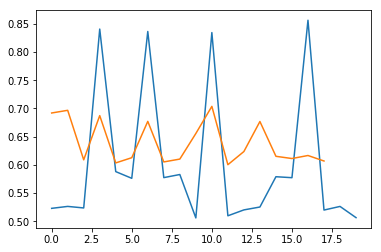

In [53]:
#plt.clabel('Comparison between transmission means from the RAW and their corresponding JPEG images ')
plt.plot( trans_rgb)
plt.plot( trans_jpg)

In [47]:
print(contrast_rgb)

[45.681212407771916]


In [0]:
temp = os.listdir('')